In [86]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

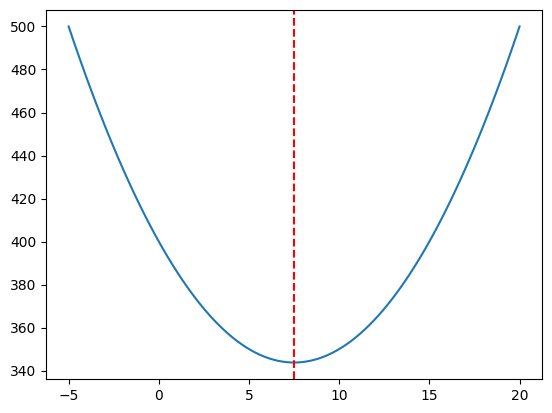

In [87]:
import random
import math
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt

def quad(a,b,c,x):
  return a*(x**2) + b*x + c
a,b,c = 1, -15, 400
X = np.linspace(-5, 20, 100)
y  = [quad(a, b, c , xi) for xi in X]
plt.plot(X,y)
x_optimun = 15/2
# draw a vertical line at the optimal input
plt.axvline(x=x_optimun, ls='--', color='red')

In [88]:
## Here we go

def search(x, alpha):
  return x + random.gauss(0,1) * alpha

def fitnessFunction(x):
  return x**2 -15*x + 400

def boltzmann(deltaE,  T, k=1):
  return exp(-deltaE/(k*T))

In [89]:
random.seed(1)
solution = random.gauss(0,1)
solution
Ti, Tf = 100, 0
T = Ti
cooling_rate = 100
while T>Tf:
  for _ in range(cooling_rate):
    solution_temp  = search(solution, 0.1)
    E0, E1 = fitnessFunction(solution), fitnessFunction(solution_temp)
    if E1 < E0:
      solution = solution_temp
    else:
      if random.uniform(0,1) < boltzmann(E1-E0, T):
        solution = solution_temp
  T = T - 0.01
print(solution)

7.555987296129486


# Two variables

\begin{equation}
f(x,y) = x^{2} - 4xy + 5y^{2} - 4y +3
\end{equation}

First order conditions
\begin{equation}
f_{x} = 2x - 4y = 0 \\
f_{y} = -4x + 10y - 4 = 0
\end{equation}

Therefore $x^{*}=4, y^{*}=2$.

In [90]:
def search(solution, alpha):
  return solution  + randn(len(solution)) * alpha

def fitnessFunction(solution):
  x, y = solution[0], solution[1]
  return x**2 - 4*x*y  + 5*y**2 - 4*y +3

In [91]:
from numpy.random import randn
from numpy import asarray

In [92]:
solution = randn(2) # Number of parameters to estimate

In [93]:
def SA(solution, search,  Ti, Tf, cooling_rate,  fitnessFunction, seed):
  T = Ti
  while T>Tf:
    for _ in range(cooling_rate):
      solution_temp  = search(solution, 0.1)
      E0, E1 = fitnessFunction(solution), fitnessFunction(solution_temp)
      if E1 < E0:
        solution = solution_temp
      else:
        if random.uniform(0,1) < boltzmann(E1-E0, T):
          solution = solution_temp
    T = T - 0.01
  return solution

In [94]:
solution  = randn(2) # two variables
Ti , Tf = 200, 0
cooling_rate = 50

In [95]:
SA(solution, search, Ti, Tf, cooling_rate, fitnessFunction, seed=1 )

array([3.99545805, 1.98598617])